In [26]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [27]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#path of example directory 
path = "/content/gdrive/MyDrive/deeplearning/"

In [ ]:
def plotImages(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.style.use('seaborn')
    plt.show()

In [ ]:
# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image = cv2.imread(path+'happiness.jpg')

In [ ]:
# Converting BGR image into a RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

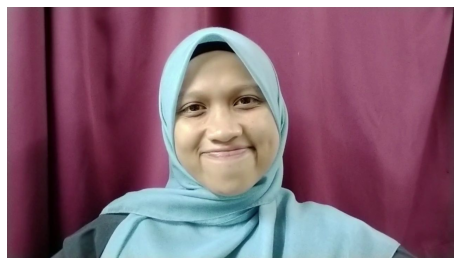

In [38]:
# plotting the original image
plotImages(image)
  
face_detect = cv2.CascadeClassifier(path+'haarcascade_frontalface_default.xml')
face_data = face_detect.detectMultiScale(image, 1.3, 5)

In [39]:
# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in face_data:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image[y:y+h, x:x+w]
    # applying a gaussian blur over this new rectangle area
    roi = cv2.GaussianBlur(roi, (23, 23), 30)
    # impose this blurred image on original image to get final image
    image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

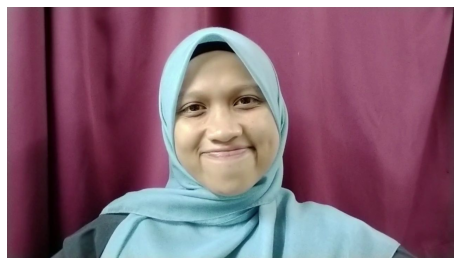

In [40]:
# Display the output
plotImages(image)